# Project Scope

Use Seaborn and Matplotlib to create data visualizations that convey valuable insights into the relationship between GDP and life expectancy of six countries. The provided data will need to be preprocessed for optimal data analysis and visualization.


Goal: generate data visualizations that convey valuable insights into the relationship between GDP and life expectancy of six countries

Actions: write blog post describing findings

Data:
* GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

* Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Analysis: Relationships between data will be described using visualizations. 

Ethical Considerations: this data (national GDP by year) does not infringe on the privacy of any person or organization. The data is openly transparent and can be validated by anyone. The countries included in the data set are: Chile, China, Germany, Mexico, United States and Zimbabwe. These countries are relatively spread across many different categories included geographic location, culture, economy, etc, having included one country from Africa, Asia, Europe, and North, Central and South America. Limiting the dataset to only six countries restricts the datasets ability to be inclusive of all Country types, but in this case the six included are relatively spread.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels


# Import Data

## Inevstigate data

* Inspect the first 5 rows.

* Print general dataframe info and statistics.


In [2]:
data = pd.read_csv('all_data.csv')

print(data.head())
print(data.info())
print(data.describe(include = 'all'))

data = data.replace('United States of America', 'USA')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Country                             96 non-null object
Year                                96 non-null int64
Life expectancy at birth (years)    96 non-null float64
GDP                                 96 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
                         Country         Year  \
count                         96    96.000000   
unique                         6          NaN   
top     United States of America          NaN   
freq                          

* Print unique values from Country column
* Print unique values from Year column

In [3]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


* Mean and median life expectnacy and GDP were calculated above.
    * Mean Life Expectancy: 72.789583
    * Mean GDP: 76.750000
    * Median Life Expectancy: 3.880499e+12
    * Median GDP: 1.280220e+12

* Determine mean and median life expectancy and GDP by country.

In [4]:
no_year = data.drop(['Year'], axis=1)
# Observe average and median life expectancy and GDP by country
print(no_year.groupby(['Country']).mean())
print(no_year.groupby(['Country']).median())

          Life expectancy at birth (years)           GDP
Country                                                 
Chile                             78.94375  1.697888e+11
China                             74.26250  4.957714e+12
Germany                           79.65625  3.094776e+12
Mexico                            75.71875  9.766506e+11
USA                               78.06250  1.407500e+13
Zimbabwe                          50.09375  9.062580e+09
          Life expectancy at birth (years)           GDP
Country                                                 
Chile                                79.00  1.729975e+11
China                                74.45  4.075195e+12
Germany                              79.85  3.396350e+12
Mexico                               75.65  1.004376e+12
USA                                  78.15  1.445000e+13
Zimbabwe                             47.40  6.733671e+09


## Plot

* Plot life expectancy for all countries by year

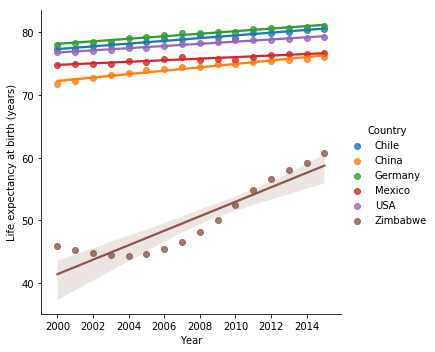

In [5]:
sns.lmplot(data=data, x='Year', y="Life expectancy at birth (years)", hue='Country')

* Not all life expectancies are on the same scale which makes the above graph hard to interpret.
    * Seperate plots into seperate figures with different scales for each axis

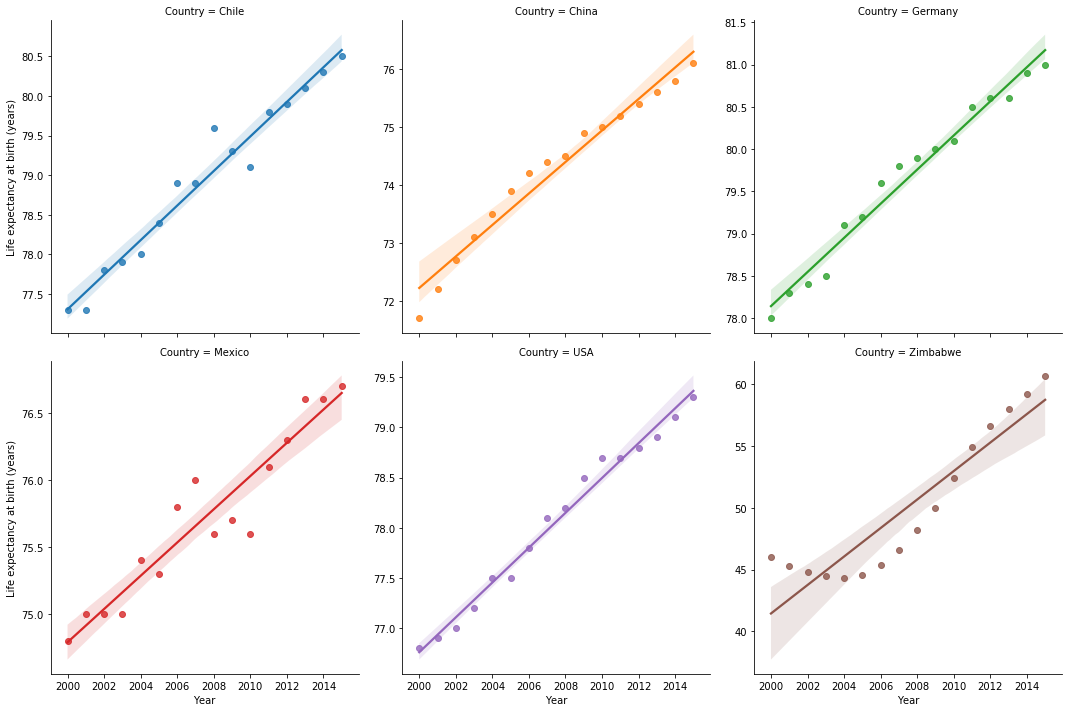

In [6]:
gdp = sns.lmplot(data=data, x="Year", y="Life expectancy at birth (years)", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharey=False))

* Repeat for GDP

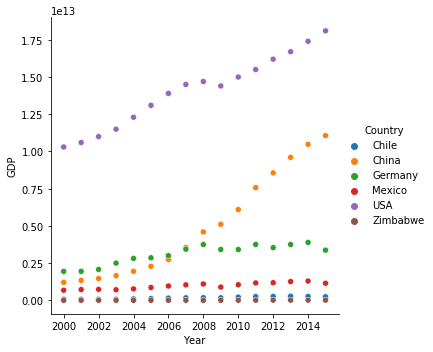

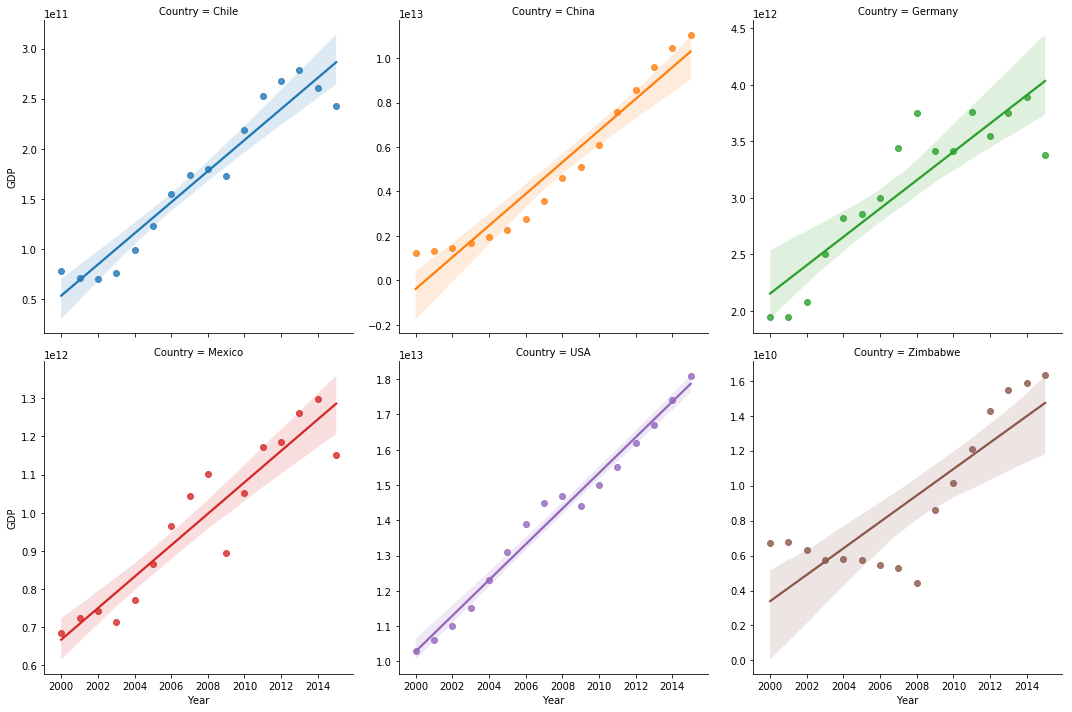

In [7]:
sns.relplot(data=data, x='Year', y="GDP", hue='Country')

gdp = sns.lmplot(data=data, x="Year", y="GDP", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharey=False))

* Generate plot of life expectancy as a function of GDP for all countries

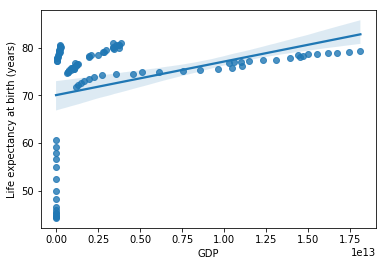

In [8]:
sns.regplot(data=data, x='GDP', y='Life expectancy at birth (years)')


* Generate the same plot without outliers

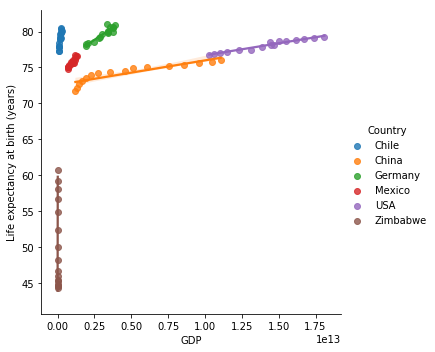

In [9]:
sns.lmplot(data=data, x='GDP', y='Life expectancy at birth (years)', hue='Country')

* Generate the same plot by country

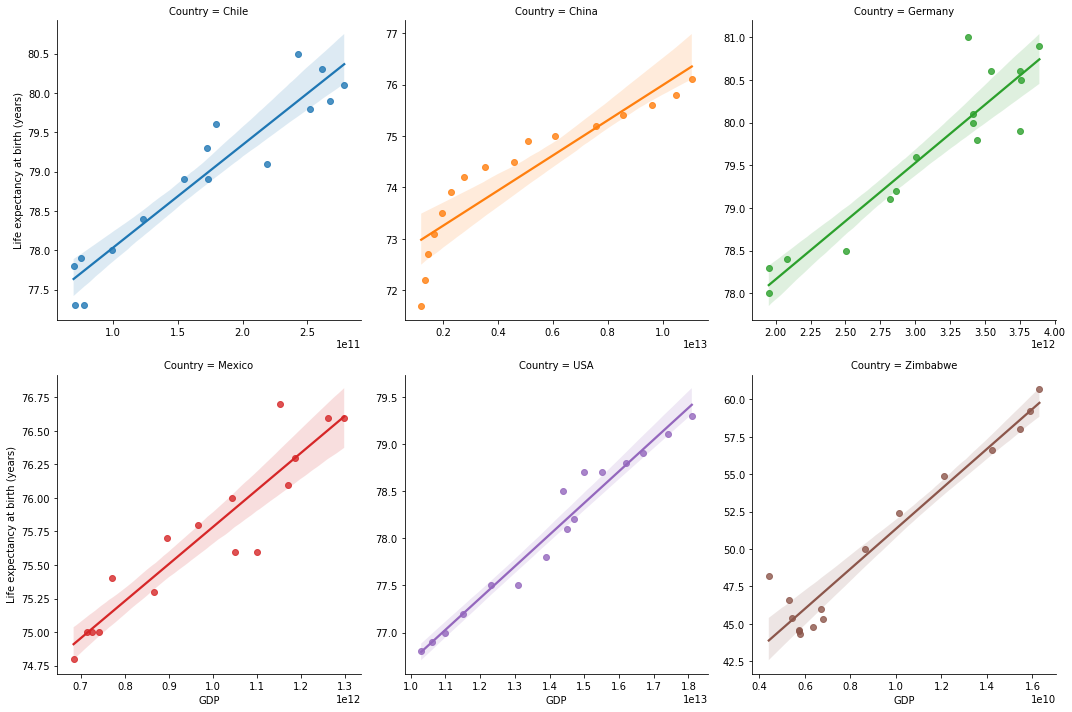

In [10]:
gdp = sns.lmplot(data=data, x="GDP", y="Life expectancy at birth (years)", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharex=False, sharey=False))

## Findings

Chile and Germany have higher Life Expectancy than USA with significantly lower GDP.

All Countries Life Expectancy and GDP were positively corelated over the time period. Of all six countries, USA has the lowest correlation between Life Expectancy and GDP. This should be investigated further.

Zimbabwe's life expectancy and GDP both intially had negative slopes yet both rebounded with very positive slopes by the end of the timeperiod. Life expecancy flipped slopes before GDP which is interesting (LE ~2005, GWP ~2009). This is should be investigated further. The jump from 2008 to 2009 is significant.